# SENTIMENT ANALYSIS ON AMAZON ALEXA REVIEWS  

The dataset used was downloaded from kaggle and it contains the rating, feedback and detailed reviews of users for Amazon Alexa. The goal is to analyse the reviews and conclude if they are more of a positive, negative or neutral nature.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("https://raw.githubusercontent.com/thisisesha/Amazon-Alexa/main/amazon_alexa.tsv", delimiter='\t')
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [2]:
print(data.describe())
print(data.isnull().sum())
print(data.columns)

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


The ratings given by users are from 1 to 5, with 5 being the highest. The following pie chart gives us an idea of the nature of the ratings received.

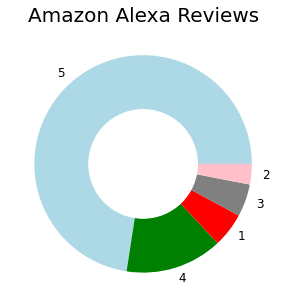

In [10]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["lightblue", "green", 'red', "grey", "pink"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

As we can see, most of the reviews have the highest rating meaning most users are happy with Alexa. In order to do sentiment analysis, we will be adding 3 new columns to the dataset namely - "Positive", "Negative" and "Neutral" by calculating the sentiment scores of the "verified_reviews" column.

In [11]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Positive  \
0                                      Love my Echo!         1     0.692   
1                                          Loved it!         1     0.807   
2  Sometimes while playing a game, you can answer...         1     0.114   
3  I have had a lot of fun with this thing. My 4 ...         1     0.383   
4                                              Music         1     0.000   

   Negative  Neutral  
0     0.000    0.308  
1     0.000    0.193  
2     0.102    0.784  
3     0.000    0.617  
4     0.000    1.000  


Now, we will take a sum of all the three newly added columns to check what the overall sentiment of all reviews is.

In [12]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


We found out that the reviews are of neutral nature.

In [13]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1035.4579999999983
Negative:  96.79999999999995
Neutral:  1936.740999999996


After printing the values of individual columns, it can be observed that the positive and neutral scores exceed the negative score. 
Hence, it will be safe to say that the overall sentiment of all the Amazon Alexa reviews is positive.